In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [199]:
df = pd.read_csv('data/SPY.txt')
df = df.set_index(df['timestamp'].values)
df

,timestamp,open,close,high,low,volume
2020-07-14 11:35:00-04:00,2020-07-14 11:35:00-04:00,316.050,315.870,316.180,315.850,38341
2020-07-14 11:40:00-04:00,2020-07-14 11:40:00-04:00,315.830,316.380,316.420,315.805,27457
2020-07-14 11:45:00-04:00,2020-07-14 11:45:00-04:00,316.440,316.251,316.660,315.950,86829
2020-07-14 11:50:00-04:00,2020-07-14 11:50:00-04:00,316.240,315.850,316.390,315.850,28661
2020-07-14 11:55:00-04:00,2020-07-14 11:55:00-04:00,315.870,316.010,316.040,315.721,24601
...,...,...,...,...,...,...
2020-07-15 18:05:00-04:00,2020-07-15 18:05:00-04:00,322.600,322.600,322.600,322.600,200
2020-07-15 18:15:00-04:00,2020-07-15 18:15:00-04:00,322.670,322.670,322.670,322.670,100
2020-07-15 18:20:00-04:00,2020-07-15 18:20:00-04:00,322.600,322.600,322.600,322.600,1000
2020-07-15 18:40:00-04:00,2020-07-15 18:40:00-04:00,322.210,322.210,322.210,322.210,500


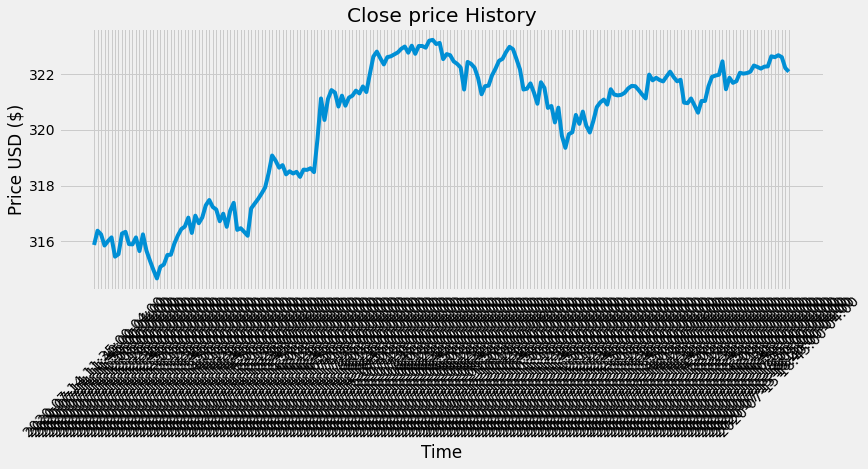

In [200]:
#visually show the stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['close'], label="close")
plt.xticks(rotation=45)
plt.title('Close price History')
plt.xlabel('Time')
plt.ylabel('Price USD ($)')
plt.show()

In [201]:
ShortEMA = df.close.ewm(span=12,adjust=False).mean()
LongEMA = df.close.ewm(span=26,adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9,adjust=False).mean()

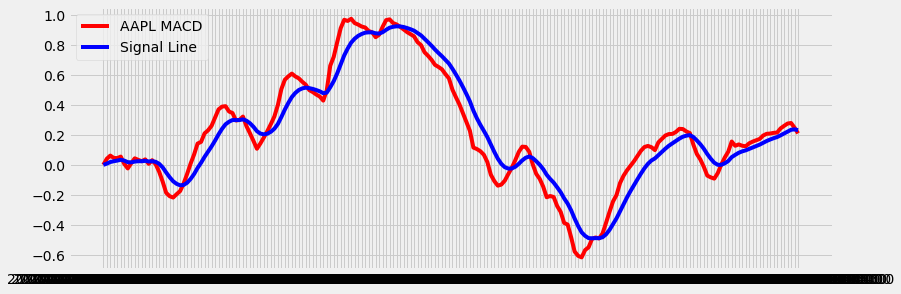

In [202]:
#plot the chart
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,MACD,label='AAPL MACD',color='red')
plt.plot(df.index,signal,label='Signal Line',color='blue')
plt.legend(loc='upper left')
plt.show()

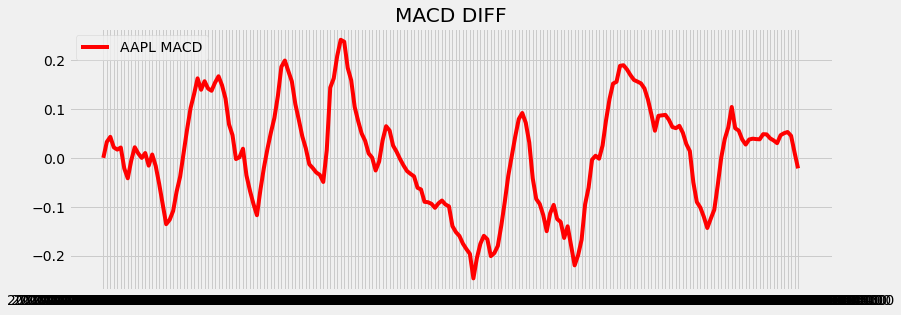

In [205]:
diff = MACD-signal
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,diff,label='AAPL MACD',color='red')
plt.legend(loc='upper left')
plt.title("MACD DIFF")
plt.show()

In [204]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [181]:
your_money = 10000
count = 0
number_of_shares = 25
curr_num_of_share = 0
prev = 0
take_profit = 0
stop_loss = 0
flat = 0
for tf in diff.keys():
    if flat == 0:
        if df['close'][tf] < take_profit or df['close'][tf] > stop_loss
        number_of_shares = your_money//df['close'][tf]
        curr_num_of_share = curr_num_of_share + number_of_shares
        your_money = your_money - number_of_shares*df['close'][tf]
        print("{} Buy {}, current number of shares is {} with price of {}, your money is {}".format(tf,
              number_of_shares,curr_num_of_share,df['close'][tf],your_money))
        take_profit
    if (prev < 0 and diff[tf] > 0):
        if df['close'][tf] < take_profit or df['close'][tf] > stop_loss
        number_of_shares = your_money//df['close'][tf]
        curr_num_of_share = curr_num_of_share + number_of_shares
        your_money = your_money - number_of_shares*df['close'][tf]
        print("{} Buy {}, current number of shares is {} with price of {}, your money is {}".format(tf,
              number_of_shares,curr_num_of_share,df['close'][tf],your_money))

    if prev > 0 and diff[tf] < 0:
        curr_num_of_share = curr_num_of_share - number_of_shares
        your_money = your_money + number_of_shares*df['close'][tf]
        print("{} Sell {}, current number of shares is {} with price of {}, your money is {}".format(tf,
              number_of_shares,curr_num_of_share,df['close'][tf],your_money))
    prev = diff[tf]
            
        

SyntaxError: invalid syntax (<ipython-input-181-30741e4799d8>, line 11)

Text(0.5, 1.0, 'RSI')

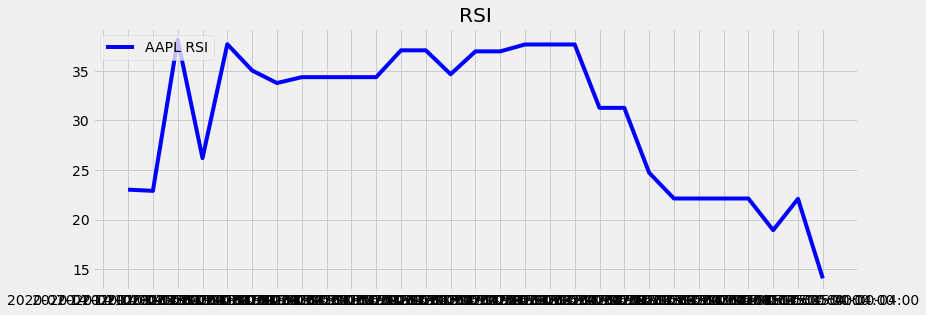

In [182]:
df['RSI'] = computeRSI(df['close'], 9)
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,df['RSI'],label='AAPL RSI',color='blue')
plt.legend(loc='upper left')
plt.title("RSI")

In [212]:
stop_loss_percent = 0.01
take_profit_percent = 0.01
your_money = 10000
curr_shares = 0
status = "normal"
num_of_shares = 20
stop_loss = 0
take_profit = 0
prev = 0
loss_count = 0
trade_count = 0
trade_price = 0
count = 0
for tf in diff.keys():
    if count > 10:
        # entry long and look for exit long
        if status == "long":
            if (prev < 0 and diff[tf] > 0) or df['close'][tf] > take_profit or df['close'][tf] < stop_loss:
                your_money = your_money + df['close'][tf]*num_of_shares
                curr_shares = curr_shares - num_of_shares
                print("{} Exit long {}, current number of shares is {} with price of {}, your money is {}".format(tf,
                  num_of_shares,curr_shares,df['close'][tf],your_money))
                status = "normal"
                if trade_price > df['close'][tf]:
                    loss_count = loss_count + 1
        # entry short and look for exit short
        if status == "short":
            if (prev > 0 and diff[tf] < 0) or df['close'][tf] < take_profit or df['close'][tf] > stop_loss:
                your_money = your_money - df['close'][tf]*num_of_shares
                curr_shares = curr_shares + num_of_shares
                print("{} Exit short {}, current number of shares is {} with price of {}, your money is {}".format(tf,
                  num_of_shares,curr_shares,df['close'][tf],your_money))
                status = "normal"
                if trade_price < df['close'][tf]:
                    loss_count = loss_count + 1
        # not holding any position
        if status == "normal":
            # see a buy signal
            if prev > 0 and diff[tf] < 0:
                status = "long"
                stop_loss = df['close'][tf]*(1-stop_loss_percent)
                take_profit = df['close'][tf]*(1+take_profit_percent)
                curr_shares = curr_shares + num_of_shares
                your_money = your_money - df['close'][tf]*num_of_shares
                print("{} Entry Long {}, current number of shares is {} with price of {}, your money is {}".format(tf,
                  num_of_shares,curr_shares,df['close'][tf],your_money))
                trade_count = trade_count + 1
                trade_price = df['close'][tf]
            # see a sell signal
            if prev < 0 and diff[tf] > 0:
                status = "short"
                stop_loss = df['close'][tf]*(1+stop_loss_percent)
                take_profit = df['close'][tf]*(1-take_profit_percent)
                curr_shares = curr_shares - num_of_shares
                your_money = your_money + df['close'][tf]*num_of_shares
                print("{} Entry Short {}, current number of shares is {} with price of {}, your money is {}".format(tf,
                  num_of_shares,curr_shares,df['close'][tf],your_money))
                trade_count = trade_count + 1
                trade_price = df['close'][tf]
    prev = diff[tf]
    count = count + 1

print("Win rate: {}".format(1-loss_count/trade_count))

2020-07-14 12:30:00-04:00 Entry Long 20, current number of shares is 20 with price of 315.89, your money is 3682.2000000000007
2020-07-14 12:35:00-04:00 Exit long 20, current number of shares is 0 with price of 316.14, your money is 10005.0
2020-07-14 12:35:00-04:00 Entry Short 20, current number of shares is -20 with price of 316.14, your money is 16327.8
2020-07-14 12:40:00-04:00 Exit short 20, current number of shares is 0 with price of 315.65, your money is 10014.8
2020-07-14 12:40:00-04:00 Entry Long 20, current number of shares is 20 with price of 315.65, your money is 3701.7999999999993
2020-07-14 12:45:00-04:00 Exit long 20, current number of shares is 0 with price of 316.25, your money is 10026.8
2020-07-14 12:45:00-04:00 Entry Short 20, current number of shares is -20 with price of 316.25, your money is 16351.8
2020-07-14 12:50:00-04:00 Exit short 20, current number of shares is 0 with price of 315.67, your money is 10038.399999999998
2020-07-14 12:50:00-04:00 Entry Long 20, 

In [219]:
print(df['close'][-1] )

322.08099999999996
